# Assignment 2

## (a)

**Develop appropriate descriptive statistics to summarize the data, including relating graphs.**

In [6]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')           # 将Matplotlib的绘图样式更改为Seaborn的样式
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt         # 设置输出图表为矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

data = pd.read_csv('Professional.csv')

相关统计性数据如下：

In [49]:
data.describe()

,Age,Value of Investments ($),Number of Transactions,Household Income ($),Unnamed: 8,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,410.000000,410.000000,410.000000,410.000000,0.0,0.0,0.0,0.0,0.0
mean,30.112195,28538.292683,5.973171,74459.512195,NaN,NaN,NaN,NaN,NaN
std,4.024023,15810.830741,3.100873,34818.210672,NaN,NaN,NaN,NaN,NaN
min,19.000000,0.000000,0.000000,16200.000000,NaN,NaN,NaN,NaN,NaN
25%,28.000000,18300.000000,4.000000,51625.000000,NaN,NaN,NaN,NaN,NaN
50%,30.000000,24800.000000,6.000000,66050.000000,NaN,NaN,NaN,NaN,NaN
75%,33.000000,34275.000000,7.000000,88775.000000,NaN,NaN,NaN,NaN,NaN
max,42.000000,133400.000000,21.000000,322500.000000,NaN,NaN,NaN,NaN,NaN


各项数据的直方图绘制结果如下：

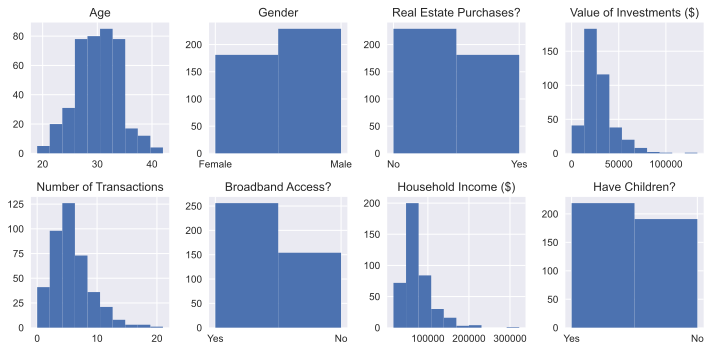

In [48]:
fig, axs = plt.subplots(2, 4, figsize=(10, 5))
axs[0, 0].hist(data['Age'])                     # 绘制直方图
axs[0, 0].set_title('Age')
axs[0, 1].hist(data['Gender'], bins = 2)     
axs[0, 1].set_title('Gender')
axs[0, 2].hist(data['Real Estate Purchases?'], bins =2)     
axs[0, 2].set_title('Real Estate Purchases?')
axs[0, 3].hist(data['Value of Investments ($)']) 
axs[0, 3].set_title('Value of Investments ($)')
axs[1, 0].hist(data['Number of Transactions']) 
axs[1, 0].set_title('Number of Transactions')
axs[1, 1].hist(data['Broadband Access?'], bins = 2) 
axs[1, 1].set_title('Broadband Access?')
axs[1, 2].hist(data['Household Income ($)']) 
axs[1, 2].set_title('Household Income ($)')
axs[1, 3].hist(data['Have Children?'], bins = 2) 
axs[1, 3].set_title('Have Children?')
plt.tight_layout()  # 调整子图间距
plt.show()

## (b)

**The publisher wants to test whether the mean value of investment of the Male differs from that of the Female. Formulate the hypothesis that can be used. At α = .05, what is your conclusion?**

In [53]:
# 两个总体非配对样本的均值检验
data_1 = data[data['Gender'] == 'Male']
data_2 = data[data['Gender'] == 'Female']
print('男性投资者投资额的均值：', data_1['Value of Investments ($)'].mean())
print('女性投资者投资额的均值：', data_2['Value of Investments ($)'].mean())

'''
H_0: 均值相同
H_a: 均值不同
'''

import scipy.stats
significance_level = 0.05
t,pval = scipy.stats.ttest_ind(data_1['Value of Investments ($)'],data_2['Value of Investments ($)'],alternative = 'two-sided')
print('p_value 的值为:',pval)
print('因此,是否拒绝原假设:',pval<significance_level)

男性投资者投资额的均值： 27538.427947598255
女性投资者投资额的均值： 29803.31491712707
p_value的值为: 0.1500093127233882
因此,是否拒绝原假设: False


因此，在该显著性水平下不能拒绝'男性的平均投资价值与女性相同'的假设

## (c)

**Formulate the hypothesis that can be used to determine whether the proportion of female who does not have any children equals to 0.6. At α = .05, what is your conclusion?**

In [69]:
# 对概率p进行二项检验

import scipy 
x = len(data[data['Have Children?']=='No'])     # 符合要求的实验次数
n = len(data)                                   # 总试验次数
significance_level = 0.05

# 进行二项检验
result = scipy.stats.binomtest(x, n, 0.6, alternative='two-sided')

# 打印p值
print("p-value:", result.pvalue)                # result为一个BinomTestResult对象

# 根据p值判断是否拒绝零假设
if result.pvalue < significance_level:
    print("拒绝零假设,即实际的成功概率显著不同于0.6")
else:
    print("不能拒绝零假设,即实际的成功概率不显著不同于0.6")

p-value: 4.431725568155503e-08
拒绝零假设,即实际的成功概率显著不同于0.6


因此，在该显著性水平下可以认为：没有子女的人数比例显著不同于0.6

## (d)

The publisher believes the median number of household income is 62000$. Utilize sign test to accept or reject this hypothesis at α = .05.

In [76]:
# 用符号检验判断中位数
 
def sign_test(data,median):
    k=min(len(data[data>median]), len(data[data<median]))
    pval=2*scipy.stats.binom.cdf(k, len(data), 0.5)
    return pval

significance_level = 0.05
median = 62000
print('p-value:',sign_test(data['Household Income ($)'],median))
if result.pvalue < significance_level:
    print("拒绝零假设,即收入中位数显著不同于62000")
else:
    print("不能拒绝零假设,即收入中位数不显著不同于62000")

p-value: 0.008777148281168668
拒绝零假设,即收入中位数显著不同于62000


因此，在该显著性水平下我们可以拒绝'收入中位数为62000'的假设。

## (e)

**Would this magazine be a good place to advertise for companies selling educational software and computer games for young children? Remember to make your argument reasonable.**

对于这个问题，我们主要分析消费者中有孩子的人数占比和装有宽带的家庭数占比。

In [ ]:
child_per = len(data[data['Have Children?']=='Yes'])/len(data)
broadband_per = len(data[data['Broadband Access?']=='Yes'])/len(data)
print(f'被调对象有孩子的占比为:{child_per*100:.2f}%')
print(f'被调对象家里装宽带的占比为:{broadband_per*100:.2f}%')

被调对象有孩子的占比为:53.41%
被调对象家里装宽带的占比为:62.44%


根据以上数据可以初步判断，半数以上的被调对象有孩子而且对新事物接受程度较高(从装有宽带体现出来)。故这是一个销售教育软件和儿童电脑游戏的公司做广告的不错选择